# <font color="red">III. Project: Titanic Survival Prediction </font>

* Data: train.csv and test.csv
* Objective: Predict which passengers are more likely to survive

In [1]:
!pip install xgboost

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
def classification_(train,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x=train
    y=y
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x,y).predict(x)
        
        accuracy.append(accuracy_score(y,predict))
        precision.append(precision_score(y,predict))
        recall.append(recall_score(y,predict))
        f1.append(f1_score(y,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)
    
    
    

In [6]:
df1=pd.read_csv('ttrain.csv')
df2=pd.read_csv('ttest.csv')

### EDA

In [7]:
df1.shape,df2.shape
#test dosyasında hayatta kalanların sütunu yok

((891, 12), (418, 11))

In [8]:
df=df1.append(df2)
df.shape

(1309, 12)

In [9]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
625,626,0.0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
652,653,0.0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
571,572,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
171,172,0.0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
182,1074,NaN,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S
530,531,1.0,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
376,1268,NaN,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S
291,1183,NaN,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.9500,NaN,Q
221,222,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
99,100,0.0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


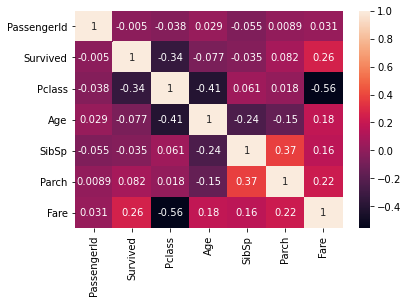

In [13]:
sns.heatmap(df.corr(),annot=True);

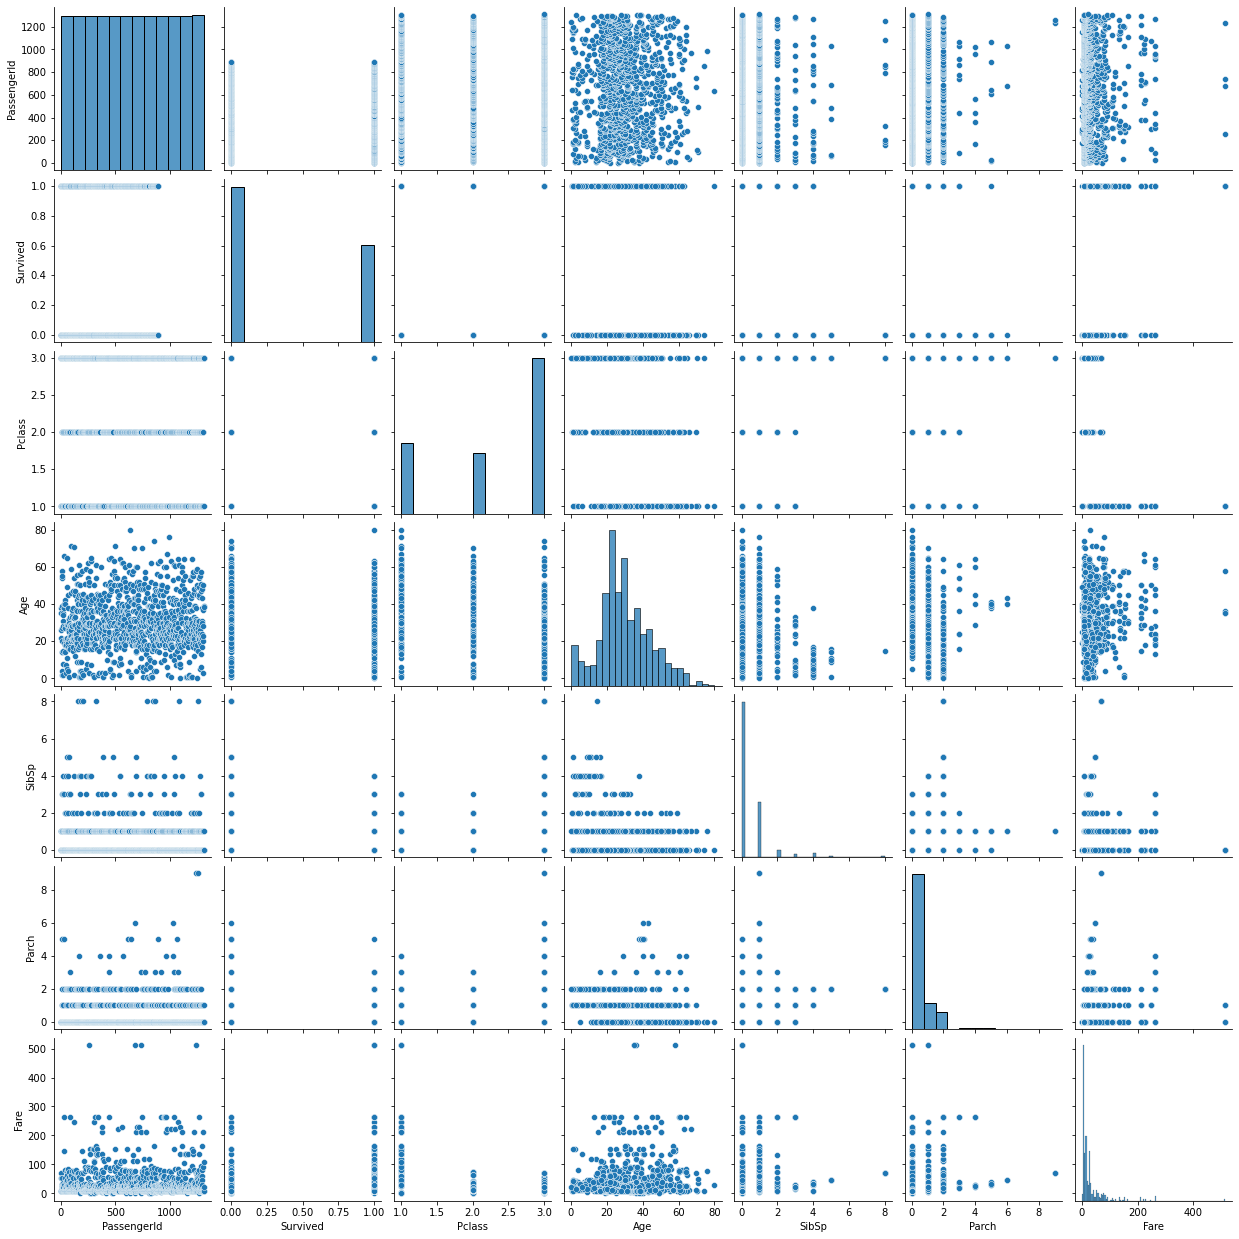

In [14]:
sns.pairplot(data=df)

In [15]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Missing Value Imputation

In [16]:
df['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
C22 C26            4
                  ..
B11                1
C49                1
E49                1
A14                1
C50                1
Name: Cabin, Length: 186, dtype: int64

In [17]:
df['Cabin']=df['Cabin'].fillna('C23 C25 C27')

In [18]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
dtype: int64

In [19]:
df['Fare'].mean()

33.2954792813456

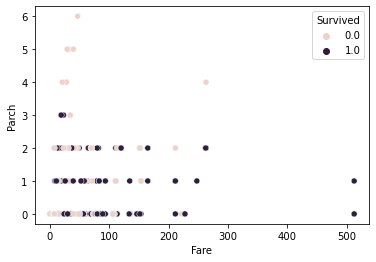

In [20]:
sns.scatterplot(x='Fare',y='Parch',hue='Survived',data=df);

In [21]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

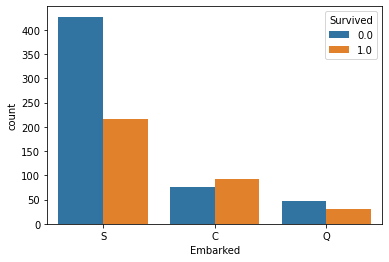

In [22]:
sns.countplot(x='Embarked',hue='Survived',data=df);

In [23]:
df['Embarked']=df['Embarked'].fillna('C')

### Future Engineering

In [24]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')

df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [25]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1
df['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [26]:
#df['Single']=df.FamilySize<2
#df['Small']=(df.FamilySize>1) & (df.FamilySize<5)
#df['Medium']=(df.FamilySize>4) & (df.FamilySize<7)
#df['Large']=df.FamilySize>6

df['Single']=np.where(df.FamilySize<2,1,0)
df['Small']=np.where((df.FamilySize>1) & (df.FamilySize<5),1,0)
df['Medium']=np.where((df.FamilySize>4) & (df.FamilySize<7),1,0)
df['Large']=np.where(df.FamilySize>6,1,0)


In [27]:
#df.replace({'True':1,'False':0},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Single,Small,Medium,Large
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,Mr,2,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,Miss,1,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,Mr,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,C23 C25 C27,S,Mr,1,1,0,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,1,1,0,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S,Mr,1,1,0,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,C23 C25 C27,S,Mr,1,1,0,0,0


In [28]:
df['Fare'].mean()

33.2954792813456

In [29]:
df['Fare']=df['Fare'].fillna(33.2954792813456)

In [30]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
Single           0
Small            0
Medium           0
Large            0
dtype: int64

In [31]:
df['Age'].fillna(df.groupby("Title")['Age'].transform("median"),inplace=True)

In [32]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
Single           0
Small            0
Medium           0
Large            0
dtype: int64

In [33]:
df.select_dtypes(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked,Title
0,"Braund, Mr. Owen Harris",male,A/5 21171,C23 C25 C27,S,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C23 C25 C27,S,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,"Allen, Mr. William Henry",male,373450,C23 C25 C27,S,Mr
...,...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,C23 C25 C27,S,Mr
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C,Mrs
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,C23 C25 C27,S,Mr
416,"Ware, Mr. Frederick",male,359309,C23 C25 C27,S,Mr


In [34]:
df=df.drop(columns=['PassengerId','Ticket','Name','Cabin','Embarked'],axis=1)

In [35]:
# Dummie Variables
data=pd.get_dummies(df,drop_first=True)

In [36]:
data.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Single,Small,Medium,Large,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,0,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,1,0,0,0,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,1,0,0,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,0,1,0,1,0
5,0.0,3,30.0,0,0,8.4583,1,1,0,0,0,1,0,1,0
6,0.0,1,54.0,0,0,51.8625,1,1,0,0,0,1,0,1,0
7,0.0,3,2.0,3,1,21.0750,5,0,0,1,0,1,0,0,0
8,1.0,3,27.0,0,2,11.1333,3,0,1,0,0,0,0,0,1
9,1.0,2,14.0,1,0,30.0708,2,0,1,0,0,0,0,0,1


In [37]:
train=data[:891]
test=data[891:]

In [38]:
train.shape,test.shape

((891, 15), (418, 15))

In [39]:
del train['Survived']

In [40]:
y=df1['Survived']

In [41]:
classification_(train,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
RandomForest,0.979798,0.990909,0.956140,0.973214
DecisionTree,0.979798,0.993902,0.953216,0.973134
GradientBoosting,0.897868,0.900958,0.824561,0.861069
AdaBoost,0.842873,0.806061,0.777778,0.791667
LogisticRegr,0.828283,0.798107,0.739766,0.767830
Gaussian,0.822671,0.772189,0.763158,0.767647
KNeigbors,0.818182,0.784810,0.725146,0.753799
Bernoulli,0.810325,0.758209,0.742690,0.750369
Multinominal,0.701459,0.647287,0.488304,0.556667
SVC,0.687991,0.716216,0.309942,0.432653


In [42]:
del test['Survived']

In [43]:
test.head(200)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Single,Small,Medium,Large,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,2,0,1,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,1,1,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,0,0,1,0,1,0
4,3,22.0,1,1,12.2875,3,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,33.0,0,0,7.8542,1,1,0,0,0,1,0,1,0
196,1,6.0,0,2,134.5000,3,0,1,0,0,1,0,0,0
197,3,18.0,0,0,7.7750,1,1,0,0,0,0,1,0,0
198,2,23.0,0,0,10.5000,1,1,0,0,0,1,0,1,0


In [44]:
d=DecisionTreeClassifier()
predict=d.fit(train,y).predict(test)

In [45]:
predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
result=df2[['PassengerId']]

In [47]:
#Future Engineering
#result['Survived']=predict

In [48]:
#result.head(200)

In [49]:
rf=RandomForestClassifier()
pred3=rf.fit(train,y).predict(test)

In [50]:
xgb=XGBClassifier()
pred4=rf.fit(train,y).predict(test)

In [51]:
result['Survived']=pred3

In [52]:
result.to_csv('Titanic_result.csv',index=False)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#classification da sonuncu sigmoid olursa daha isabetli olur


model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy"])
# Cevap evet-hayır olacağı için loss='binary_crossentropy' yaptık,3 seçenekli bir cevap bekleseydik 
# loss='crossentropy' veya loss='category_crossentropy' kullanacaktık.
# optimizer="adam" optimize ederken momentum kullan dedik
# regression yapsaydık metrics=["mse"] yapacaktık.


In [83]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=550,batch_size=3,verbose=1)

Epoch 1/550
297/297 [==============================] - 0s 987us/step - loss: 0.2331 - accuracy: 0.9001
Epoch 2/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.8956
Epoch 3/550
297/297 [==============================] - 0s 982us/step - loss: 0.2249 - accuracy: 0.9001
Epoch 4/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2405 - accuracy: 0.8945
Epoch 5/550
297/297 [==============================] - 0s 972us/step - loss: 0.2471 - accuracy: 0.8945
Epoch 6/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.8967
Epoch 7/550
297/297 [==============================] - 0s 982us/step - loss: 0.2435 - accuracy: 0.8956
Epoch 8/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.9012
Epoch 9/550
297/297 [==============================] - 0s 975us/step - loss: 0.2311 - accuracy: 0.8990
Epoch 10/550
297/297 [==============================] - 0s 972us/step - loss: 0.2

297/297 [==============================] - 0s 962us/step - loss: 0.2363 - accuracy: 0.8945
Epoch 81/550
297/297 [==============================] - 0s 960us/step - loss: 0.2270 - accuracy: 0.9024
Epoch 82/550
297/297 [==============================] - 0s 960us/step - loss: 0.2390 - accuracy: 0.9001
Epoch 83/550
297/297 [==============================] - 0s 959us/step - loss: 0.2375 - accuracy: 0.8956
Epoch 84/550
297/297 [==============================] - 0s 957us/step - loss: 0.2442 - accuracy: 0.8967
Epoch 85/550
297/297 [==============================] - 0s 967us/step - loss: 0.2485 - accuracy: 0.8889
Epoch 86/550
297/297 [==============================] - 0s 966us/step - loss: 0.2990 - accuracy: 0.8889
Epoch 87/550
297/297 [==============================] - 0s 954us/step - loss: 0.2501 - accuracy: 0.8956
Epoch 88/550
297/297 [==============================] - 0s 968us/step - loss: 0.2497 - accuracy: 0.8934
Epoch 89/550
297/297 [==============================] - 0s 957us/step - loss:

297/297 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8900
Epoch 238/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.8934
Epoch 239/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.8878
Epoch 240/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.8979
Epoch 241/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.8878
Epoch 242/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8911
Epoch 243/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8934
Epoch 244/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.8979
Epoch 245/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.8945
Epoch 246/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2475 - a

297/297 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.8956
Epoch 396/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.8923
Epoch 397/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.8990
Epoch 398/550
297/297 [==============================] - 0s 994us/step - loss: 0.2574 - accuracy: 0.8911
Epoch 399/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2352 - accuracy: 0.8923
Epoch 400/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.8967
Epoch 401/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.8990
Epoch 402/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.8967
Epoch 403/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.8911
Epoch 404/550
297/297 [==============================] - 0s 1ms/step - loss: 0.2367 -

In [84]:
model.summary()
#Özet=kaç layer var onların parametreleri kaç gösterir

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                208       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [85]:
scores=model.evaluate(train ,y)
#score larımız belirlenir 
#2 score umuz var biri loss biri accuracy

28/28 [==============================] - 0s 719us/step - loss: 0.2236 - accuracy: 0.9035


In [86]:
print("%s : %.2f%%" % (model.metrics_names[1],scores[1]*100))
#model.metrics[1] dersek 2.scorumuz olan accuracy ismini yazdırır,scores[1]*100 ile de accuracy değerini yüzde haline getirip yazdırdık

accuracy : 90.35%


In [87]:
test=scaler.fit_transform(test)

In [88]:
test=scaler.fit_transform(test)
pred=model.predict(test)

In [89]:
pred

array([[6.08811378e-02],
       [1.35624100e-06],
       [4.12223041e-02],
       [1.48809999e-01],
       [9.40115690e-01],
       [1.60693347e-01],
       [2.47672200e-02],
       [3.71297020e-08],
       [1.00000000e+00],
       [6.90490007e-04],
       [1.10954106e-01],
       [4.13218230e-01],
       [1.00000000e+00],
       [7.83744763e-17],
       [1.00000000e+00],
       [9.92974043e-01],
       [2.25880355e-01],
       [1.16068453e-01],
       [4.71578568e-01],
       [9.50850189e-01],
       [8.68825436e-01],
       [9.99966741e-01],
       [1.00000000e+00],
       [1.77663565e-03],
       [1.00000000e+00],
       [1.39299159e-18],
       [9.99989748e-01],
       [1.33200198e-01],
       [4.13663805e-01],
       [2.84329236e-01],
       [1.85308002e-09],
       [8.04527105e-12],
       [7.79226422e-03],
       [3.74838114e-02],
       [4.62782592e-01],
       [7.84733891e-02],
       [3.87026608e-01],
       [6.06486320e-01],
       [1.73079103e-01],
       [6.83122337e-01],
